# Name: Kanika Singh

# Predicting Scores using Supervised ML

In this sample project we are going to predict the scores based on the number of hours of study using Linear Regression in One Variable.

Linear Regression in One Variable is a simple Linear Regression Machine Learning algorithm, in which a value of a variable (dependent variable) is predicted based on the value of another variable (independent variable). 

In this case the dependent variable, the value of which we have to predict is 'Scores', while the independent variable, on which the value of Scores depends is, 'Hours'.

## Checking out the data

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# accessing dataset from the given URL

url="http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Percentage Score')

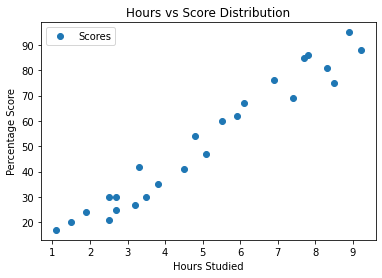

In [13]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Score Distribution')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

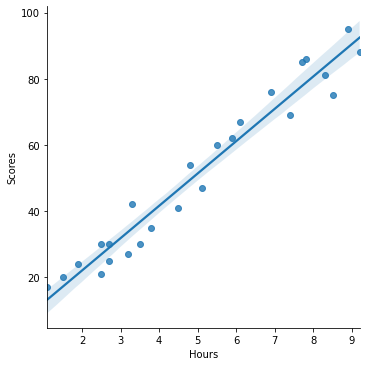

In [9]:
# plotting the regression plot using seaborn
import seaborn as sns

sns.lmplot(x='Hours', y='Scores', data=data)

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on (which is only 'Hours' column in this case), and a y array with the target variable, in this case the Scores column.

### X and y arrays

In [23]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

### Train-test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Creating and Training the Model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [29]:
lr.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

Let's evaluate the model by checking out it's coefficient and how we can interpret them.

In [31]:
# print the intercept
print(lr.intercept_)

3.4050301755918895


In [33]:
# print the coefficient of 'Hours' column
print(lr.coef_)

[9.65029083]


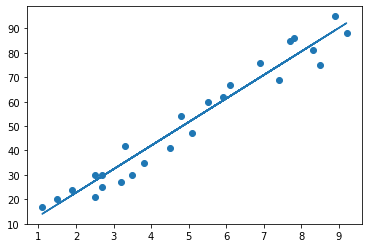

In [36]:
# Plotting the regression line
line = lr.coef_*X + lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);


## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [37]:
predictions = lr.predict(X_test)

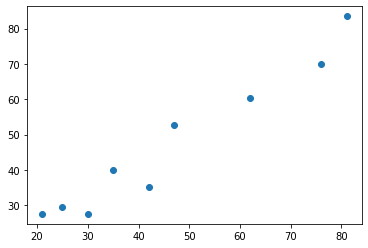

In [38]:
plt.scatter(y_test,predictions)

## Regression Evaluation Metrics

In [39]:
from sklearn import metrics

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.564015037730867
MSE: 24.074686364260987
RMSE: 4.90659620962037


## Comparing Actual and Predicted values

In [41]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df 

,Actual,Predicted
0,81,83.502444
1,30,27.530757
2,21,27.530757
3,76,69.992037
4,62,60.341746
5,25,29.460815
6,42,35.250990
7,47,52.621513
8,35,40.076135


## Testing prediction with our own value

In [45]:
hours = np.array(9.25).reshape(-1,1)
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.67022037739972
